In [1]:
%matplotlib notebook

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Winery Growth in the US from (2009 - 2017)

In [3]:
csvpath_WR = os.path.join('..', 'Data','Clean', 'us_wineries_2009_2019_clean.csv')
csvpath_AC = os.path.join('..', 'Data','Clean', 'Per_Capita_alcohol_graph.csv')
WR_df = pd.read_csv(csvpath_WR)
AC_df = pd.read_csv(csvpath_AC)
#Renaming Columns
WR_df = WR_df.rename(columns={'year':'Year', 'number of wineries in US':'# Wineries in US'})
AC_df = AC_df.rename(columns={'Wine':'Per capita_Gal of wine'})

In [5]:
# combining both csv.files
merged_wine = pd.merge(WR_df,AC_df, how='outer', on='Year')
merged_wine

,Year,# Wineries in US,Per capita_Gal of wine
0,2009,6357,0.39
1,2010,6941,0.38
2,2011,7306,0.41
3,2012,7396,0.42
4,2013,7498,0.42
5,2014,7762,0.43
6,2015,8287,0.42
7,2016,8702,0.43
8,2017,9091,0.43
9,2018,9654,NaN


In [6]:
# dropping null row
merged_wine = merged_wine.dropna(how='any')
merged_wine

,Year,# Wineries in US,Per capita_Gal of wine
0,2009,6357,0.39
1,2010,6941,0.38
2,2011,7306,0.41
3,2012,7396,0.42
4,2013,7498,0.42
5,2014,7762,0.43
6,2015,8287,0.42
7,2016,8702,0.43
8,2017,9091,0.43


<IPython.core.display.Javascript object>


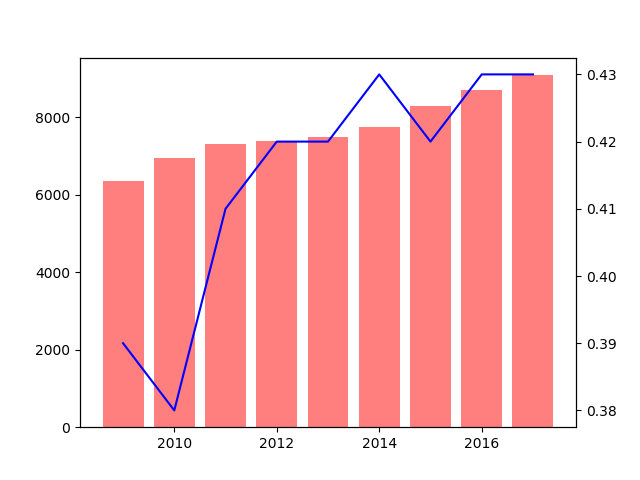

In [12]:
# set x axis
x_axis = np.arange(len(merged_wine))

#Plot graph with 2 "y" axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.bar(merged_wine['Year'],merged_wine['# Wineries in US'], color='r', alpha = 0.5, align ='center')

# Setting ax2 to be the second "y" axis with x shared
ax2 = ax1.twinx()

# line Plot
ax2.plot(merged_wine['Year'],merged_wine['Per capita_Gal of wine'], color='b')

# plt.tight_layout()
plt.show()

# 2-Check us_wineries_2009_2019_clean.csv

In [ ]:

csvpath1 = os.path.join('..', 'Data','Clean', 'us_wineries_2009_2019_clean.csv')
file_df1 = pd.read_csv(csvpath1)

file_df1

# 3-Check Bonded_wine_producers_by_state_1999_june_2019_clean.csv

In [ ]:

csvpath2 = os.path.join('..', 'Data','Clean', 'Bonded_wine_producers_by_state_1999_june_2019_clean.csv')
file_df2 = pd.read_csv(csvpath2)
file_df2.

In [ ]:
#Investigating rows with Null values
file_df2.loc[file_df2.isnull().any(axis=1)]

In [ ]:
# Replace all NaN values with 0 
cleaned_df = file_df2.fillna(0)

# Drop Throu

# 4-Check Alcohol_Use_Persons_21_or_Older_by_Geographic_Socioeconomic_in_Thousands_2017_2018.csv

In [ ]:
csvpath3 = os.path.join('..', 'Data','Clean', 'Alcohol_Use_Persons_21_or_Older_by_Geographic_Socioeconomic_in_Thousands_2017_2018.csv')
file_df3 = pd.read_csv(csvpath3)

file_df3.head()

# 5-Check per_capita_alcohol_consumption_geographic_1977_2017_clean.csv

In [ ]:
csvpath4 = os.path.join('..', 'Data','Clean', 'per_capita_alcohol_consumption_geographic_1977_2017_clean.csv')
file_df4 = pd.read_csv(csvpath4)

file_df4

# 6-Check NIAAA_2017_Alcohol_Consumption_2017_Clean.csv

In [ ]:
csvpath5 = os.path.join('..', 'Data','Clean', 'NIAAA_2017_Alcohol_Consumption_2017_Clean.csv')
file_df5 = pd.read_csv(csvpath5)

file_df5.head()

# 7-Check Annual_Resident_Population_Estimates_UTF8.csv

In [ ]:
csvpath6 = os.path.join('..', 'Data','Clean', 'Annual_Resident_Population_Estimates_UTF8.csv')
file_df6 = pd.read_csv(csvpath6)

file_df6.head()